# 1D transient advection-diffusion

Compared to the transient diffusion problem, the transient advection-diffusion problem needs to consider the additional *convective term*.

## Problem setup

Consider a one-dimensional transient advection-diffusion problem, in which a field variable $\phi$ is transported through the advection-diffusion process from $x = 0$ to $x = L$ in a one-dimensional domain. The velocity $u = 2.0$ m/s, length $L = 1.5$ m, density $\rho = 1.0$ kg/m$^3$ and the diffusion coefficient $\Gamma =0.03$ kg/(m$\cdot$K).

![domain](images/transient_advection_diffusion1d.jpg)

The mathematical model for one-dimensional steady-state advection-diffusion problem is

$$\frac{\partial(\rho\phi)}{\partial t} + \frac{\partial(\rho u\phi)}{\partial x} = \frac{\partial}{\partial x}\left(\Gamma \frac{\partial\phi}{\partial x}\right) + S.$$

The boundary conditions are

$$\phi|_{x=0} = 0, \quad \frac{\partial  \phi}{\partial x}|_{x=L} = 0.$$

The initial condition is $\phi = 0$ everywhere at $t = 0$ s.

The distribution of source term is like the picture below, 

![source](images/transient_advection_diffusion1d_source_term.jpg)

where $x_1 = 0.6$ m, $x_2 = 0.2$ m, $a = -200$, $b = 100$. Solve the solution of $\phi$ until the steady state is achieved.

## Solve problem

### Define grid

Divide the rod evenly into 45 control volumes, as a result, the length of each control volume becomes $\delta x = 0.0333$ m.

### Discretize 1D transient advection-diffusion equation

We solve the problem by the ***modified QUICK scheme***. The parameter of the problem is $u = 2.0$ m/s, $\delta x = 0.0333$ m, $F = \rho u = 2.0$, $D = \frac{\Gamma}{\delta x} = 0.9$. The modified QUICK scheme uses the following formulas to calculate the field variable values at each interface of the control volume.

$$\phi_e = \phi_P + \frac{1}{8} \left( 3\phi_E - 2\phi_P - \phi_W \right)$$

$$\phi_w = \phi_W + \frac{1}{8} \left( 3\phi_P - 2\phi_W - \phi_WW \right)$$

The fully implicit discrete equation form at a general internal node is

$$\rho(\phi_P - \phi_P^0) \frac{\delta x}{\delta t} + F_e \left[ \phi_P + \frac{1}{8} \left( 3\phi_E - 2\phi_P - \phi_W \right) \right] -F_w \left[ \phi_W + \frac{1}{8} (3\phi_P - 2\phi_W - \phi_{WW}) \right] = D_e(\phi_E - \phi_P) - D_W(\phi_P - \phi_W) + \int_{\delta x} S \mathrm{d}x$$

where

$$\int_{\delta x} S \, \mathrm{d}x =
\begin{cases}
\int_0^{0.6} \left( ax + b \right) \mathrm{d}x = 24, & x\leq0.6 \\
\int_{0.6}^{0.8} \left( 100x - 80 \right) \mathrm{d}x = -2, & 0.6 < x \leq0.8 \\
0, & x > 0.8
\end{cases}$$

Special handling is required for the first and last nodes. A mirrored outer point should be set on the west outer boundary of the control volume where node 1 is located. Since $\phi_A = 0$ at the boundary $x = 0$, the field variable value at the mirror point of linear extrapolation is

$$\phi_0 = -\phi_P$$

The flow rate at the left boundary due to diffusion is

$$\Gamma\left. \frac{\partial \phi}{\partial x} \right|_A = \frac{\phi_A}{3} (9\phi_P - 8\phi_A - \phi_E)$$

Therefore, the discrete equation of node 1 is

$$\rho(\phi_P - \phi_P^0) \frac{\delta x}{\delta t} + F_e \left[ \phi_P + \frac{1}{8}(3\phi_E - \phi_P) \right] - F_A\phi_A = D_e(\phi_E - \phi_P) - \frac{D_A}{3} (9\phi_P - 8\phi_A - \phi_E)$$

At to the last node, the gradient of $\phi$ is 0, so

$$\phi_B = \phi_P$$

Therefore, the discrete equation of the last node is

$$\rho(\phi_P - \phi_P^0) \frac{\delta x}{\delta t} + F_B\phi_P - F_W\left[ \phi_W + \frac{1}{8} (3\phi_P - 2\phi_W - \phi_{WW}) \right] = 0 - D_W(\phi_P - \phi_W)$$

We can summarize the form of the discrete equations and get

$$a_P\phi_P = a_W\phi_W + a_E\phi_E + a_P^0\phi_P^0 + S_u$$

$$a_P = a_W + a_E + a_P^0 + (F_e - F_w)-S_P, \quad a_P^0 = \rho\frac{\delta x}{\delta t}$$

The coefficients are summarized in the following table

| node      | $a_{W}$       | $a_{E}$                 | $S_{P}$                                  | $S_{u}$                                                                                              |
| :---:     | :----:        | :----:                  | :----:                                   | :----:                                                                                               |
| 1         | 0             | $D_e + \frac{D_A}{3}$   | $- \left( \frac{8}{3} D_A + F_A \right)$ | $\left( \frac{8}{3} D_A + F_A \right) \phi_A + \frac{1}{8} F_e (\phi_P - 3\phi_E) + S$               |
| 2         | $D_w + F_w$   | $D_e$                   | 0                                        | $\frac{1}{8} F_w (3\phi_P - \phi_W) + \frac{1}{8} F_e (\phi_W + 2\phi_P - 3\phi_E) + S$              |
| 3-44      | $D_w + F_w$   | $D_e$                   | 0                                        | $\frac{1}{8} F_w (3\phi_P - 2\phi_W - \phi_{WW}) + \frac{1}{8} F_e (\phi_W + 2\phi_P - 3\phi_E) + S$ |
| 45        | $D_w + F_w$   | 0                       | 0                                        | $\frac{1}{8} F_w (3\phi_P - 2\phi_W - \phi_{WW})$                                                    |

If the difference between the calculation results of two consecutive time steps is small enough (such as $10^{-6}$), it is considered that a stable-state has reached.

### Solve algebraic equations (implicit method)

In [17]:
# Parameter declarations
import numpy as np
import matplotlib.pyplot as plt

n = 45
ph0 = 0.0
dt = 0.01
L = 1.5
dx = L / n
x = np.linspace(0.5*dx, L-0.5*dx, n)
gamma = 0.03
rou = 1.0
u = 2.0
F = rou * u
D = gamma / dx
ap0 = rou * dx / dt

In [18]:
# Initialize arrays
a = np.zeros((n, n))
b = np.zeros(n)
phi = np.zeros(n)
phi0 = np.zeros(n)
time = 0.0

In [19]:
# Renew coefficients
def renew_implicit(a, b, n):
    a[0][0] = ap0 + D + D/3.0 + (8.0/3.0*D + F)
    a[0][1] = -(D + D/3.0)
    a[1][0] = -(D + F)
    a[1][1] = 2*D + F + ap0
    a[1][2] = -D
    
    for i in range(2, n - 1):
        a[i][i - 1] = -(D + F)
        a[i][i] = 2 * D + F + ap0
        a[i][i + 1] = -D
    
    a[n-1][n-2] = -(D + F)
    a[n-1][n-1] = ap0 + D + F
    
    b[0] = ap0*phi0[0] + 1.0/8.0*F*(phi0[0] - 3*phi0[1]) + 24
    b[1] = ap0*phi0[1] + 1.0/8.0*F*(3*phi0[1] - phi0[0]) + 1.0/8.0*F*(phi0[0] + 2*phi0[1] - 3*phi0[2]) + 24
    
    for i in range(2, n-1):
        pos = (i-1)*dx + dx/2.0
        if pos <= 0.6:
            S = 24
        elif 0.6 < pos <= 0.8:
            S = -2
        else:
            S = 0
        
        b[i] = (ap0*phi0[i] + 1.0/8.0*F*(3*phi0[i] - 2*phi0[i-1] - phi0[i-2]) + 1.0/8.0*F*(phi0[i-1] + 2*phi0[i] - 3*phi0[i+1]) + S)
    
    b[n-1] = ap0*phi0[n-1] + 1.0/8.0*F*(3*phi0[n-1] - 2*phi0[n-2] - phi0[n-3])

In [20]:
# Output information
def output():
    print("-----------")
    print("time = {}".format(time))
    for i in range(0, n):
        print(phi[i])

In [21]:
# Iteration using TDMA method
def TDMA(a, b, T, nx):
    C = np.zeros(nx)
    phi = np.zeros(nx)
    alph = np.zeros(nx)
    belt = np.zeros(nx)
    D = np.zeros(nx)
    A = np.zeros(nx)
    Cpi = np.zeros(nx)
    
    for j in range(0, nx):
        belt[j] = -a[j][j-1]
        D[j] = a[j][j]
        alph[j] = -a[j][j+1] if j < nx-1 else 0
        C[j] = b[j]
    
    for j in range(0, nx):
        denom = D[j] - belt[j] * A[j-1]
        A[j] = alph[j] / denom if denom != 0 else 0
        Cpi[j] = (belt[j] * Cpi[j-1] + C[j]) / denom if denom != 0 else 0
    
    phi[nx-1] = Cpi[nx-1]
    for j in range(nx-2, -1, -1):
        phi[j] = A[j]*phi[j+1] + Cpi[j]
    
    for j in range(0, nx):
        T[j] = phi[j]

In [22]:
# Iteration using Jacobi method
def Jacobi(A, b, phi, k=100):
    n = A.shape[1]
    D = np.eye(n)
    D[np.arange(n), np.arange(n)] = A[np.arange(n), np.arange(n)]
    LU = D - A
    X = np.zeros(n)

    for i in range(k):
        D_inv = np.linalg.inv(D)
        X =  np.dot(np.dot(D_inv, LU), X) + np.dot(D_inv, b)
    
    for i in range(0 ,n):
        phi[i] = X[i]

In [23]:
# Calculate the solution
for i in range(0, n):
    phi[i] = ph0
    phi0[i] = ph0

time = 0.0
go = 1

while go == 1:
    go = 0
    time += dt
    renew_implicit(a, b, n)
    # TDMA(a, b, phi, n)
    Jacobi(a, b, phi)
    
    for i in range(0, n):
        if abs(phi[i] - phi0[i]) > 1.0e-6:
            go = 1
    
    for i in range(0, n):
        phi0[i] = phi[i]
    
output()

-----------
time = 1.5100000000000011
6.0
18.000000000000007
30.00000000000001
42.000000000000014
54.00000000000003
66.00000000000003
78.00000000000003
90.0
101.99999999999932
113.99999999998798
125.99999999980719
137.99999999693256
149.99999995123852
161.9999992249244
173.99998768005463
185.99980417266147
197.9968872958205
209.95052311201937
221.21355763260254
221.4993836016016
220.6342082379482
219.64835913782747
218.65006580865105
217.6537877086974
216.71049365806644
216.61158568122656
216.6012148028397
216.60012737671096
216.60001335593998
216.60000140043255
216.60000014685198
216.60000001538333
216.60000000150123
216.59999999981005
216.59999999922226
216.59999999875413
216.5999999991413
216.60000000280468
216.60000001508013
216.60000004536715
216.6000001059163
216.6000002021355
216.6000002982933
216.60000038924136
216.59999858406954


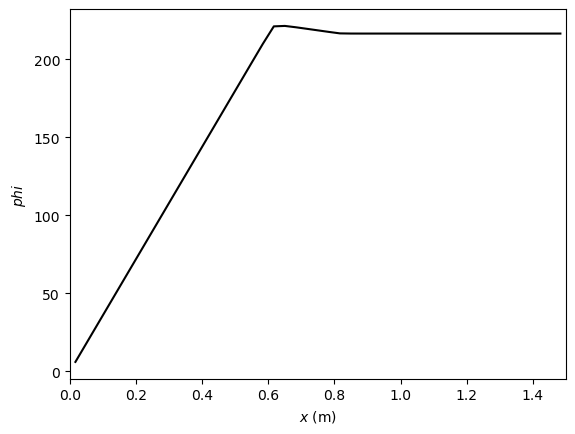

In [24]:
# Visualize the results
plt.figure()
plt.plot(x, phi, '-k')
plt.xlabel('$x$ (m)')
plt.ylabel(r'$ phi$')
ax = plt.gca()
ax.set_xlim(0, L)
plt.show()

## Exercise

1. Calculate the source term locally and redo the simulation.

2. Try the Crank-Nicolson scheme to solve the problem by yourself (Hint: change the renew function).

3. Compare the speed of calculations by TDMA and Jacobi iterations.